<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:
}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Leer el dataset desde el github.
2. Definir como indice la columna time.


In [2]:
url = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv'
df = pd.read_csv(url)

df.index = pd.to_datetime(df['time'])
df.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,,
2022-07-25 13:00:00,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


### 3. Obtenga información del data frame.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   time                5000 non-null   object 
 2   open                5000 non-null   float64
 3   high                5000 non-null   float64
 4   low                 5000 non-null   float64
 5   close               5000 non-null   float64
 6   tick_volume         5000 non-null   int64  
 7   spread              5000 non-null   int64  
 8   real_volume         5000 non-null   int64  
 9   MeanCloseOpen       5000 non-null   float64
 10  Diff_Close          5000 non-null   float64
 11  Diff_Open           5000 non-null   float64
 12  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 546.9+ KB


In [4]:
df.describe()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,1443.520003,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.000000,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1249.750000,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,2499.500000,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,3749.250000,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,4999.000000,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


### 4. Determine si hay null, nan en el data frame.

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
time,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0


### 5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

In [6]:
def PascalCase(s):
    s = s.replace("_", " ")
    return ''.join(i.capitalize() for i in s.split())


df.columns = [PascalCase(col) for col in df.columns]
df.head()

,Unnamed:0,Time,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
time,,,,,,,,,,,,,
2022-07-25 13:00:00,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [7]:
df.columns

Index(['Unnamed:0', 'Time', 'Open', 'High', 'Low', 'Close', 'TickVolume',
       'Spread', 'RealVolume', 'Meancloseopen', 'DiffClose', 'DiffOpen',
       'DiffMeancloseopen'],
      dtype='object')

In [8]:
df2 = df.drop(columns=['Unnamed:0', 'Time', 'Open', 'High', 'Low', 'TickVolume',
       'Spread', 'RealVolume', 'Meancloseopen', 'DiffClose', 'DiffOpen',
       'DiffMeancloseopen'])

df2

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


### 6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

https://pypi.org/project/fitter/
```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


In [9]:
df2['DiffPrice'] = df2.diff(periods=1)[1:]

df2

,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,NaN
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


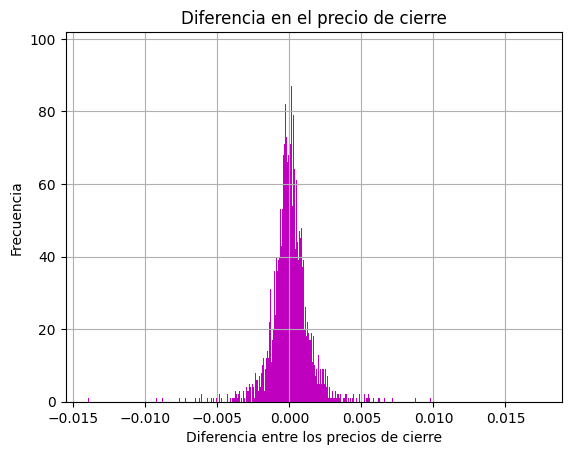

In [82]:
df2['DiffPrice'].hist(color = 'm', bins=1000)
plt.xlabel('Diferencia entre los precios de cierre')
plt.ylabel('Frecuencia')
plt.title('Diferencia en el precio de cierre')
plt.show()

In [11]:
!pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [12]:
DiffPrice1 = df2['DiffPrice'][1:].values
DiffPrice1

array([-0.00046,  0.00158,  0.00028, ..., -0.00015, -0.00013, -0.00024])

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,1660.385337,9.954290,36.022262,inf,0.011042,0.571935
genhyperbolic,1821.497871,21.312693,53.897659,inf,0.011745,0.491911
norminvgauss,1938.681101,89.072151,115.140124,inf,0.009911,0.706069
tukeylambda,1981.924322,-5.791199,13.759781,inf,0.019856,0.038305
jf_skew_t,2093.573233,-54.605696,-28.537723,inf,0.012692,0.393090


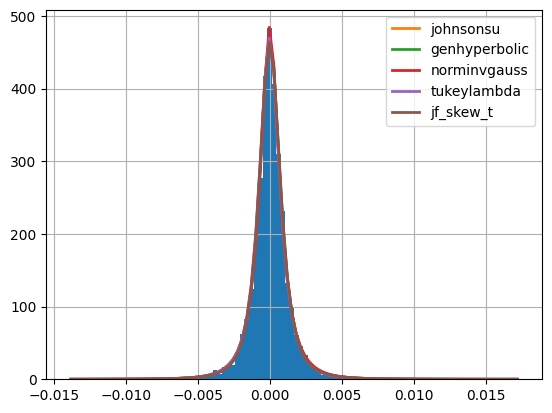

In [13]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(DiffPrice1, distributions=['_fit','alpha','anglit','arcsine','argus',
 'beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine',
 'crystalball','dgamma','dweibull','erlang','expon','exponnorm','exponpow',
 'exponweib','f','fatiguelife','fisk','foldcauchy','foldnorm','gamma',
 'gausshyper','genexpon','genextreme','gengamma','genhalflogistic',
 'genhyperbolic','geninvgauss','genlogistic','gennorm','genpareto','gibrat',
 'gompertz','gumbel_l','gumbel_r','halfcauchy','halfgennorm','halflogistic',
 'halfnorm','hypsecant','invgamma','invgauss','invweibull','jf_skew_t',
 'johnsonsb','johnsonsu','kappa3','kappa4','ksone','kstwo','kstwobign','laplace',
 'laplace_asymmetric','levy','levy_l','levy_stable','loggamma','logistic',
 'loglaplace','lognorm','loguniform','lomax','maxwell','mielke','moyal',
 'multivariate_normal','nakagami','ncf','nct','ncx2','norm','norminvgauss',
 'pareto','pearson3','powerlaw','powerlognorm','powernorm','rayleigh','rdist',
 'recipinvgauss','reciprocal','rel_breitwigner','rice','rv_continuous',
 'rv_histogram','semicircular','skewcauchy','skewnorm','studentized_range','t',
 'trapezoid','trapz','triang','truncexpon','truncnorm','truncpareto',
 'truncweibull_min','tukeylambda','uniform','vonmises','vonmises_fisher',
 'vonmises_line','wald','weibull_max','weibull_min','wrapcauchy'])
f.fit()
f.summary()

In [14]:
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')

{'johnsonsu': {'a': -0.020654532350683215,
  'b': 1.049797421216857,
  'loc': -1.5194909287993722e-05,
  'scale': 0.0008808828671326262}}

In [15]:
# Indentificamos parametros de la distrubicion beta
f.fitted_param["johnsonsu"]

(-0.020654532350683215,
 1.049797421216857,
 -1.5194909287993722e-05,
 0.0008808828671326262)

### 7. Para el data frame, seleccionemos solo los datos del 2023.

In [16]:
df2_2023 = df2[df2.index.year == 2023]

df2_2023

,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


### 8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

In [17]:
df2_2023.groupby(pd.Grouper(freq='15D')).mean()

,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


In [18]:
df2_2023.groupby(pd.Grouper(freq='W')).mean()

,Close,DiffPrice
time,,
2023-01-08,1.059972,-0.000047
2023-01-15,1.076002,0.000156
2023-01-22,1.082041,0.000020
2023-01-29,1.088414,0.000010
2023-02-05,1.089281,-0.000062
2023-02-12,1.073363,-0.000097
2023-02-19,1.069648,0.000014
2023-02-26,1.063374,-0.000124
2023-03-05,1.060854,0.000073


In [19]:
df2_2023.groupby(pd.Grouper(freq='1M')).mean()

,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


### 9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


2023-01-31 00:00:00


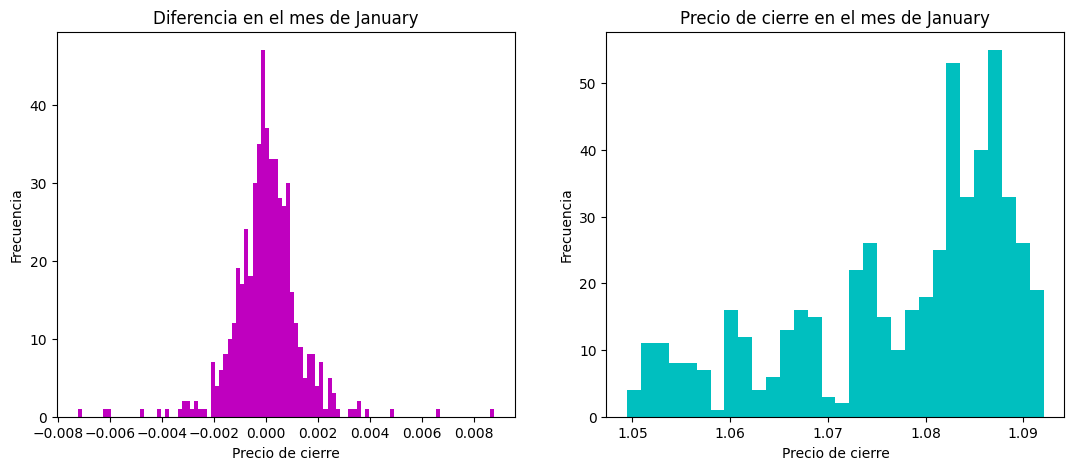

2023-02-28 00:00:00


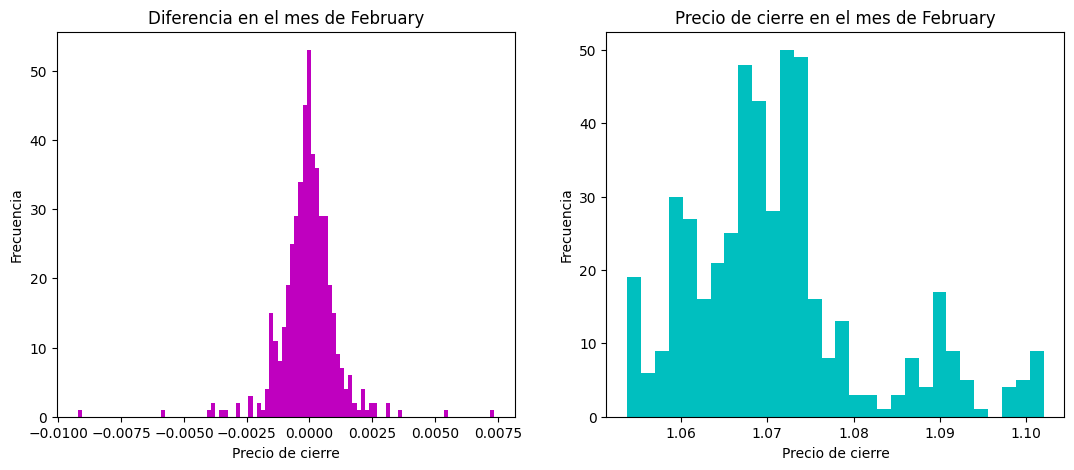

2023-03-31 00:00:00


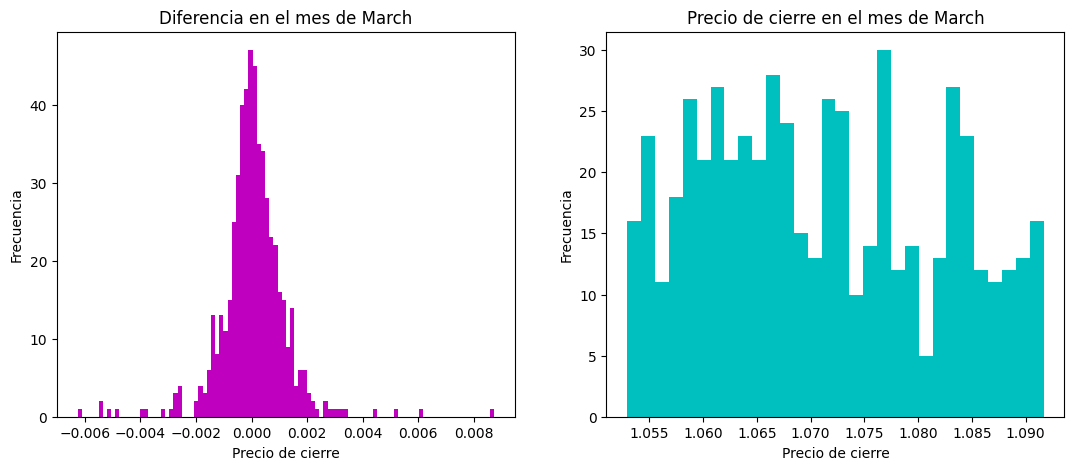

2023-04-30 00:00:00


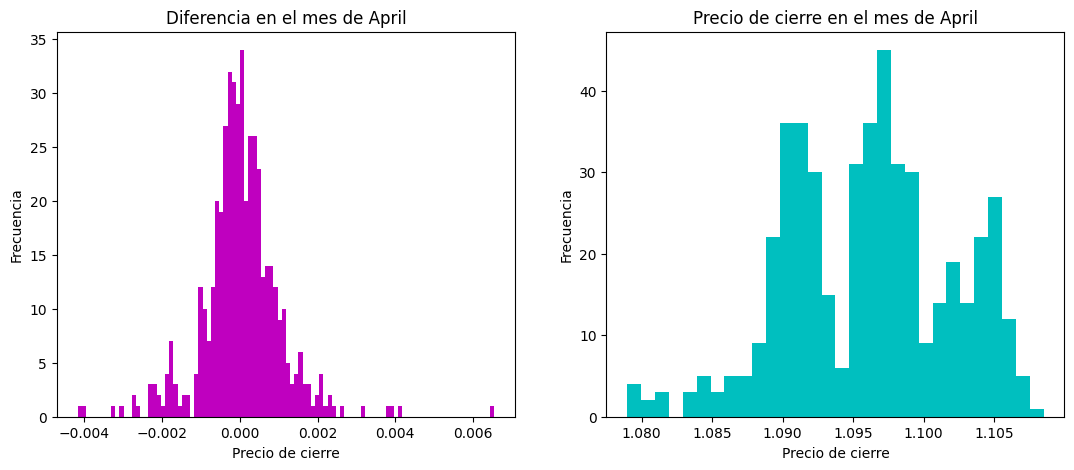

2023-05-31 00:00:00


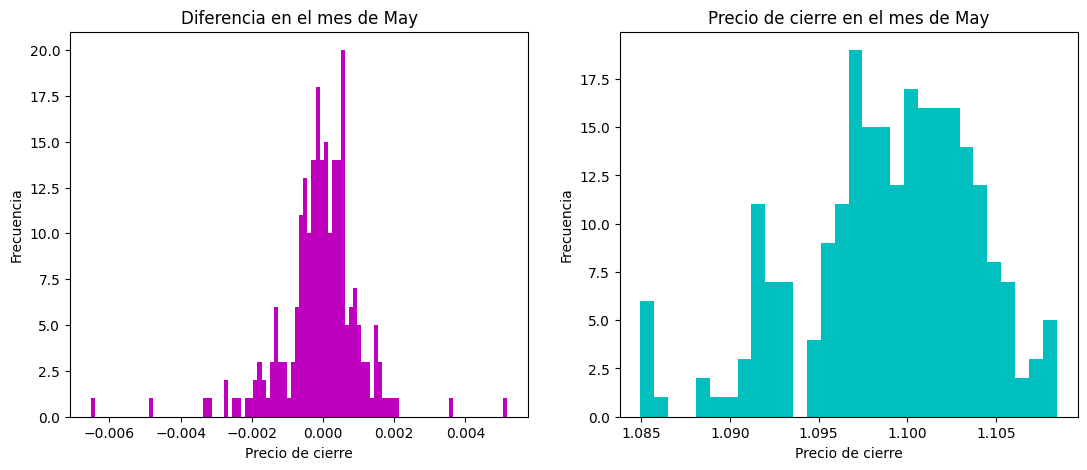

In [20]:
q = df2_2023.groupby(pd.Grouper(freq='1M'))

for name, group in q:
  print(name)

  fig, ax = plt.subplots(1, 2, figsize=(13, 5))
  ax[0].hist(group['DiffPrice'], bins=100, color='m')
  ax[0].set_title('Diferencia en el mes de {}'.format(name.strftime('%B')))    # Toma el mes --------------
  ax[0].set_xlabel('Precio de cierre')
  ax[0].set_ylabel('Frecuencia')
  ax[1].hist(group['Close'], bins=30, color='c')
  ax[1].set_title('Precio de cierre en el mes de {}'.format(name.strftime('%B')))
  ax[1].set_xlabel('Precio de cierre')
  ax[1].set_ylabel('Frecuencia')
  plt.show()

# Para el dataset realizar lo siguiente:

### 1. Leer los datos desde la página web



In [21]:
!pip install ucimlrepo

In [22]:
from ucimlrepo import fetch_ucirepo


# Este código fue extraído de la página donde se encontraban los datos.
# Intenté extreaerlos por mi cuenta desde la página pero como se
# encontraban en un archivo comprimido, no supe cómo :/

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
data = breast_cancer_wisconsin_diagnostic.data.features
target = breast_cancer_wisconsin_diagnostic.data.targets

data.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

### 2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe



In [23]:
data.columns = [PascalCase(col) for col in data.columns]
data.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3'],
      dtype='object')

### 3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,



In [24]:
data.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
data.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [26]:
data.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

Todos los datos son float y no hay ninguno nulo.

### 4. Contabilizar la cantidad de null or nan en el dataframe, si hay null, ¿que valor se puede tomar para reemplazar los datos?



In [28]:
np.isnan(data).sum()

,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0
FractalDimension1,0


No hay datos nulos o nan

### 5. Encontrar los valores  diferentes en el target, mostrar que es B y M. Emplear el metodo unique.



In [29]:
target['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

El target tiene valores 'B' y 'M' que indican el diagnostico del cancer, si es Benigno o Maligno.

###6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```



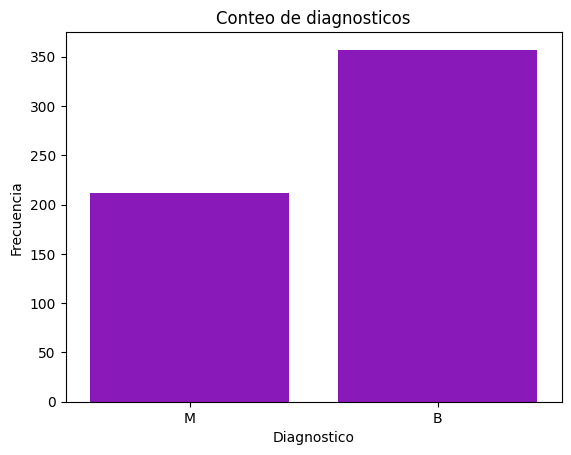

In [30]:
sns.countplot(data=target, x=target['Diagnosis'], color='darkviolet')
plt.xlabel('Diagnostico')
plt.ylabel('Frecuencia')
plt.title('Conteo de diagnosticos')
plt.show()

### 7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.



In [31]:
targetcopy = target.copy()
targetcopy['DiagnosisNumeric'] = targetcopy['Diagnosis'].map({'B': 0, 'M': 1})
targetcopy

,Diagnosis,DiagnosisNumeric
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1
...,...,...
564,M,1
565,M,1
566,M,1
567,M,1


### 8. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)



In [32]:
datacopy = data.copy()
datacopy.iloc[:, :] = datacopy.iloc[:, :].apply(lambda x: (x - x.mean())/x.std(), axis=0)
datacopy

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


### 9. Realizar un promedio de todas las características similares, llamelas:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"SymetryMean","FractalDimensionMean"]
```

Para encontrar las características similares, radius1, radius2, radius3 y tomar los promedios puede emplear expresiones regulares como:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

con base a lo anterior forme los patrones a buscar, es decir:

```python
[Radius, Texture, Perimeter, ...]
```
 y con base en ello, emplee el metodo `startwith` para un string.  





In [33]:
import re

In [34]:
# Hallando los patrones (columnas que se miden 3 veces o se repiten)
patrones = []
for i in datacopy.columns:
  k = re.match(r'^[a-zA-Z_]+', i)
  if k:
    if k.group(0) not in patrones:
      patrones.append(k.group(0))

# Creando los nombres de las nuevas columnas
cols_new = [i + 'Mean' for i in patrones]
patrones, cols_new

(['Radius',
  'Texture',
  'Perimeter',
  'Area',
  'Smoothness',
  'Compactness',
  'Concavity',
  'ConcavePoints',
  'Symmetry',
  'FractalDimension'],
 ['RadiusMean',
  'TextureMean',
  'PerimeterMean',
  'AreaMean',
  'SmoothnessMean',
  'CompactnessMean',
  'ConcavityMean',
  'ConcavePointsMean',
  'SymmetryMean',
  'FractalDimensionMean'])

In [35]:
# Calculando la media por fila y creando las nuevas columnas
for i in range(len(patrones)):
  datacopy[cols_new[i]] = datacopy.filter(like=patrones[i]).mean(axis=1)

datacopy

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,2.262762,0.303132,2.062496,2.319074,0.834796,0.045809,1.091639,2.004001,-0.936231,-0.490281
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.512694,2.129283,1.397014,1.502133,-0.337297,-0.160662,0.393593,0.934487,-0.312618,-0.840309
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.482422,1.053425,0.509009,0.395171,-0.675876,0.324159,0.294468,0.377003,-0.934205,-0.392078
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.651053,1.751949,1.906541,1.464675,0.926916,3.062208,2.596660,1.909844,1.459686,1.387908


### 10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.



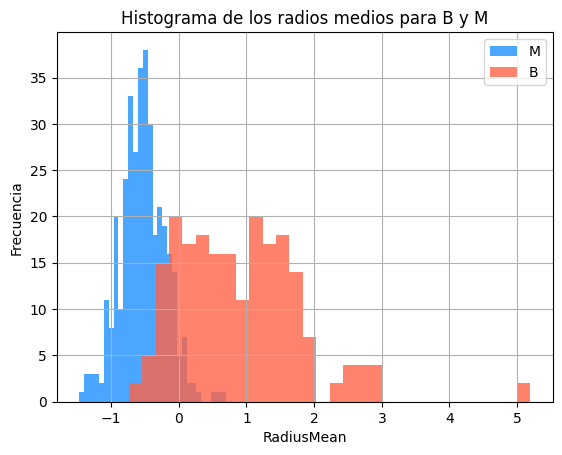

In [52]:
# Uniendo las columnas del diagnóstico a la tabla de todos los datos
datacopy['DiagnosisNumeric'] = targetcopy['DiagnosisNumeric']
datacopy['Diagnosis'] = targetcopy['Diagnosis']

# Gráfico de los histogramas agrupado por el diagnóstico
datacopy['RadiusMean'][datacopy['Diagnosis'] == 'B'].hist(bins = 30, label='M', color='dodgerblue', alpha=0.8)
datacopy['RadiusMean'][datacopy['Diagnosis'] == 'M'].hist(bins = 30, label='B', color='tomato', alpha=0.8)
plt.legend()
plt.xlabel('RadiusMean')
plt.ylabel('Frecuencia')
plt.title('Histograma de los radios medios para B y M')
plt.show()

### 11. Para las columnas:
```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"symmetry3","fractal_dimension3"]```

realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactnessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavePointsMean'),
  Text(8, 0, 'SymmetryMean'),
  Text(9, 0, 'FractalDimensionMean')])

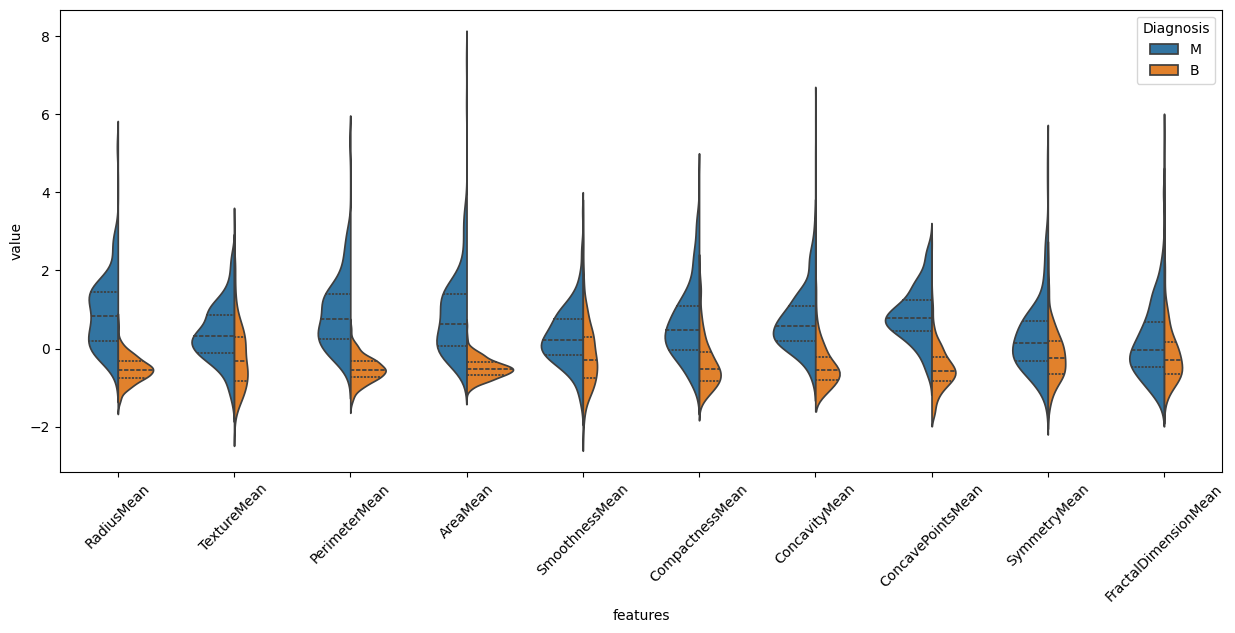

In [49]:
###################################################################
'''
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
...                    'B': {0: 1, 1: 3, 2: 5},
...                    'C': {0: 2, 1: 4, 2: 6}})
>>> df
   A  B  C
0  a  1  2
1  b  3  4
2  c  5  6

>>> pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])
   A variable  value
0  a        B      1
1  b        B      3
2  c        B      5
3  a        C      2
4  b        C      4
5  c        C      6

'''
# Agrupando losd datos por medida
dataa = pd.melt(datacopy[cols_new + ['Diagnosis']], id_vars="Diagnosis",
                var_name="features", value_name="value")

# Haciendo la gráfica de violin
plt.figure(figsize = (15,6))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=dataa,
               split=True, inner="quart")
plt.xticks(rotation=45)

### 12. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)


```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```


<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

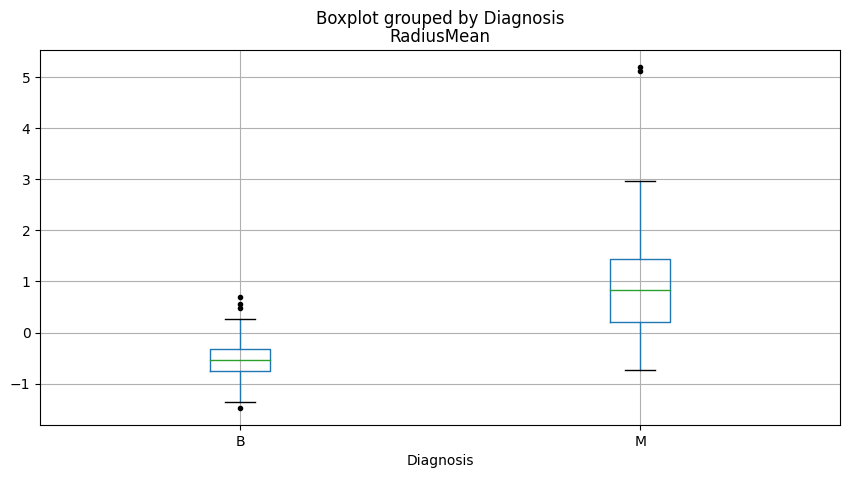

In [50]:
datacopy.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(10,5))

- ¿Qué informacion podemos obtener de este tipo de gráficos?

RESPUESTA: Este tipo de gráfico nos puede mostrar visualmente la distribución de los valores de la media de los radios (RadiusMean). La línea dentro de la caja es la mediana, los bordes de la caja son el primer cuartil (Q1) y el tercer cuartil (Q3), y las líneas que salen de la caja (bigotes) representan el rango de los datos que no son considerados como outliers. Los puntos fuera de los bigotes representan los outliers.

Del gráfico, se puede obtener información de la media, el rango intercuartílico (rango entre el primer y tercer cuartil), los outlier que podrían afectar el análisis e incluso si la distribución es simétrica o no.


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

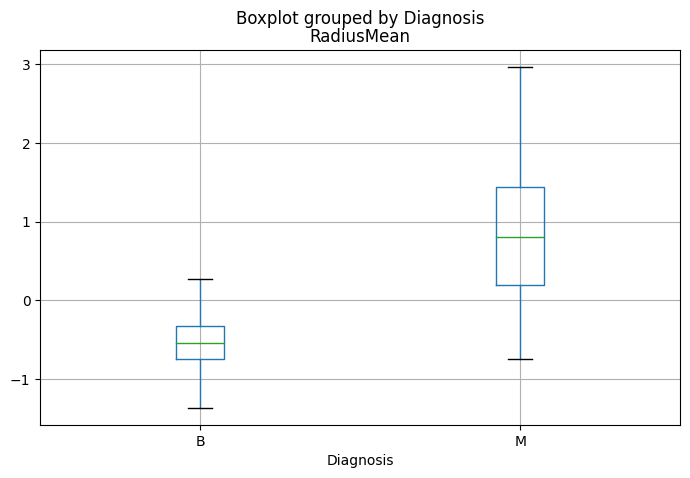

In [64]:
# Separando los datos de la tabla en los etiquetados con B y M
# para así eliminar los outliers de ambos (en la gráfic aanterior vemos
# que los datos etiquetados con B tienen otros limites de los bigotes
# respecto a los etiquetados con M)
data_B = datacopy[datacopy['Diagnosis'] == 'B'].copy()
data_M = datacopy[datacopy['Diagnosis'] == 'M'].copy()

# Aquí se calculan los cuartiles y el IQR para los datos con etiqueta B
Q1_B = data_B['RadiusMean'].quantile(0.25)
Q3_B = data_B['RadiusMean'].quantile(0.75)
IQR_B = Q3_B - Q1_B

# Límites
lim_inf_B = Q1_B - 1.5 * IQR_B
lim_sup_B = Q3_B + 1.5 * IQR_B

# Filtrar los datos de B sin outliers
data_B_no_outliers = data_B[~((data_B['RadiusMean'] < lim_inf_B) | (data_B['RadiusMean'] > lim_sup_B))]

# Se hace el mismo procedimiento para los datos etiquetados con M
Q1_M = data_M['RadiusMean'].quantile(0.25)
Q3_M = data_M['RadiusMean'].quantile(0.75)
IQR_M = Q3_M - Q1_M

lim_inf_M = Q1_M - 1.5 * IQR_M
lim_sup_M = Q3_M + 1.5 * IQR_M

data_M_no_outliers = data_M[~((data_M['RadiusMean'] < lim_inf_M) | (data_M['RadiusMean'] > lim_sup_M))]

# Uniendo los datos de las tablas etiquetadas y con valores outliers eliminados
data_no_outliers = pd.concat([data_B_no_outliers, data_M_no_outliers])

# Gráfico boxplot sin outliers
data_no_outliers.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(8,5))


Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.



### 13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

In [75]:
columnas1 = ['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'RadiusMean', 'TextureMean',
       'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean',
       'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean',
       'FractalDimensionMean', 'DiagnosisNumeric']

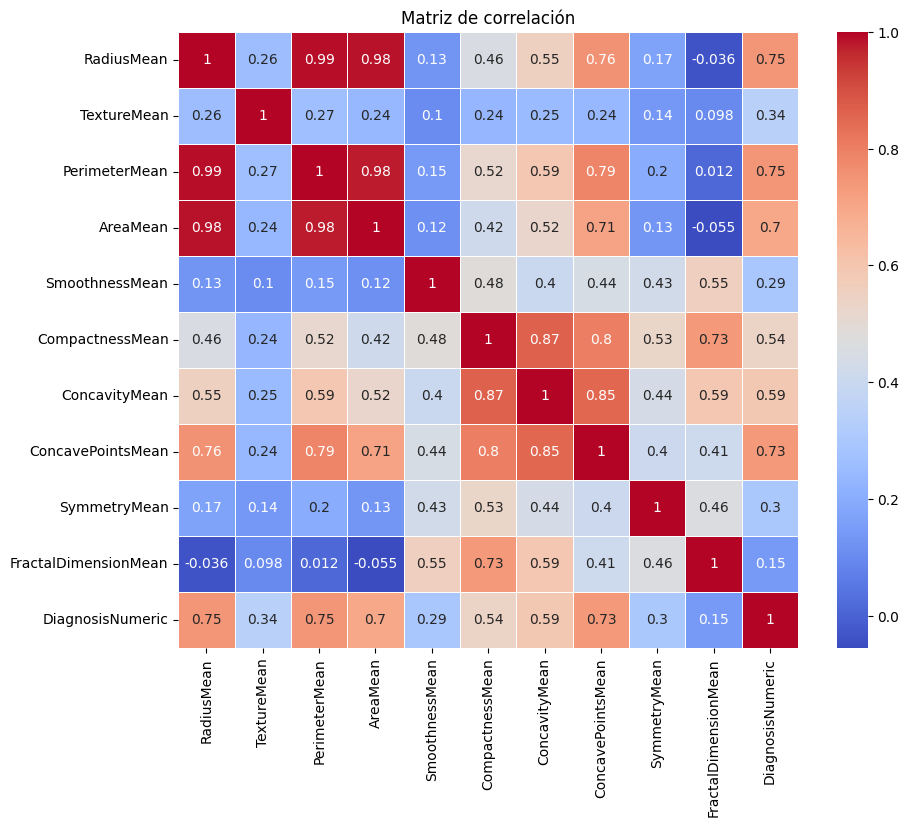

In [81]:
# Tomando la matriz correlación de todas las columans
corr_matrix = datacopy[columnas1].corr()

# Un gráfico de calor con la matriz de todas las columnas no se puede entender
# así que sólo usaré las columnas con los valores medios para ver las
# correlaciones que se encuentran entre las distintas variables
corr_matrix = corr_matrix[cols_new + ['DiagnosisNumeric']].loc[cols_new + ['DiagnosisNumeric']]


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

### 14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?


- Se podrían hacer algunos gráficos de dispersión entre algunas de las columnas con valores medios. Para esto se podría usar la función pairplot de seaborn que grafica los diagramas de dispersión entre las diferentes variables.

- Con la función joinplot también se podría obtener información importante de la distribución de las variables y al mismo tiempo, observar los diagramas de dispersión.